In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

### Loading fashion Mnist data from tensorflow

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
fashion = fashion_mnist.load_data()

In [ ]:
label = ['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankleboot']

In [ ]:
(xtrain , ytrain ), (xtest ,  ytest) = fashion
xtrain , xtest = xtrain/ 255 , xtest/ 255
xtrain = np.expand_dims(xtrain , -1)
xtest = np.expand_dims(xtest , -1)

In [ ]:
k = len(set(ytrain))

# Visualize dataset

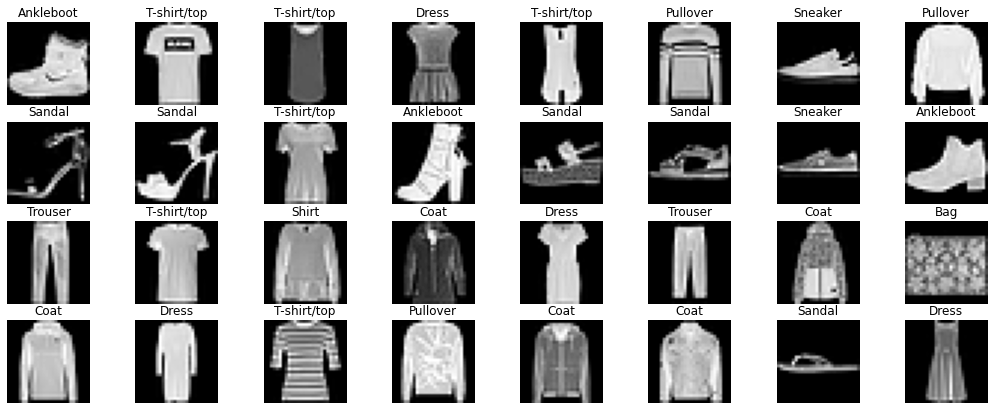

In [ ]:
plt.figure(figsize = (18 , 7))

for i in range(32):
    plt.subplot(4 , 8 , i+1)
    plt.imshow(xtrain[i].reshape(28 , 28) , cmap= "gray")
    plt.title(label[ytrain[i]])
    plt.axis("off")

# Lets Create convolution model

In [ ]:
from tensorflow.keras.layers import Input , Dense , Conv2D , MaxPool2D , BatchNormalization , Flatten , Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

In [ ]:
from tensorflow.keras.losses import CategoricalCrossentropy

In [ ]:
i = Input(shape = xtrain[0].shape)
x = Conv2D(32 , (3 ,3) , padding = "same" , activation= "relu") (i)
x = MaxPool2D()(x)
x = Conv2D(64 , (3 ,3) , padding = "same" , activation= "relu") (x)
x = MaxPool2D()(x)
x = Conv2D( 128, (3 ,3) , padding = "same" , activation= "relu") (x)
x = MaxPool2D()(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(718 , activation= "relu")(x)
x = Dropout(0.2)(x)
x = Dense(k , activation= "softmax")(x)

model = Model(i , x)

        

In [ ]:
model.compile(optimizer= Adam(0.0001 , 0.99 , 0.9999) , loss = "sparse_categorical_crossentropy" , metrics = ["accuracy"])

In [ ]:
model.summary()

Model: "model_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_28 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 3, 3, 128)         0  

In [ ]:
r = model.fit(xtrain , ytrain  , batch_size= 32 , validation_data=(xtest , ytest) , epochs= 100 )

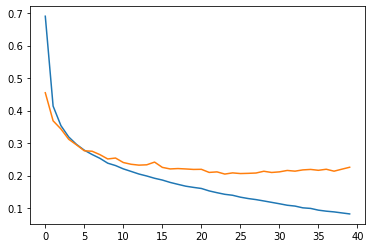

In [ ]:
plt.plot(r.history["loss"])
plt.plot(r.history["val_loss"])

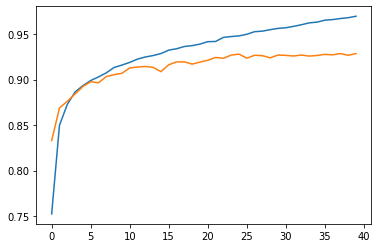

In [ ]:
plt.plot(r.history["accuracy"])
plt.plot(r.history["val_accuracy"])

### Train accuracy

In [ ]:
model.evaluate(xtrain , ytrain)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0498 - accuracy: 0.9848


[0.04983436316251755, 0.9847833514213562]

### Test Accuracy

In [ ]:
model.evaluate(xtest , ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.2256 - accuracy: 0.9286


[0.22564977407455444, 0.928600013256073]

### Ytest prediction

In [ ]:
pred = model.predict(xtest)

In [ ]:
pred = np.argmax(pred , axis = 1)

## Lets plot the confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

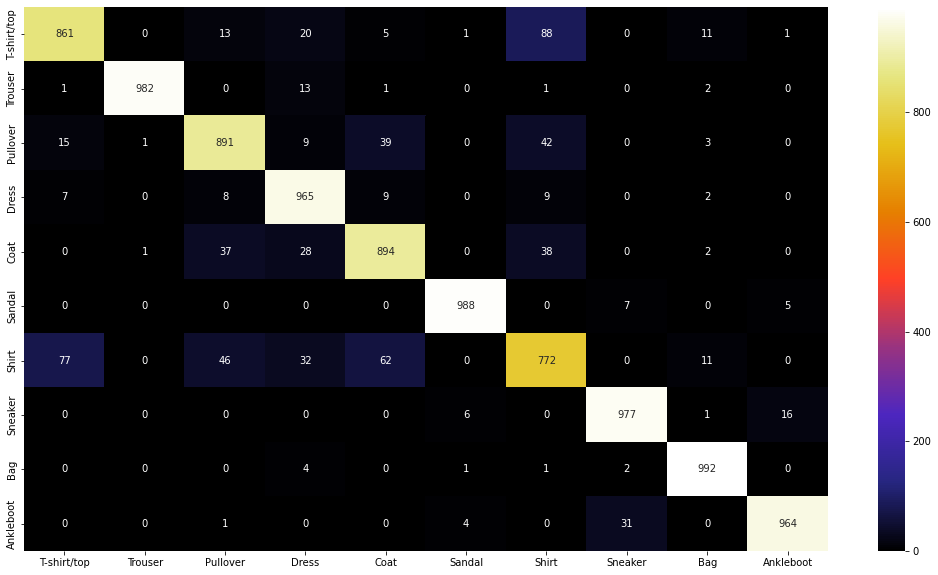

In [ ]:
plt.figure(figsize= (18 , 10))
heatmap = seaborn.heatmap(confusion_matrix(ytest , pred) , annot = True , fmt = "d" , cmap= "CMRmap" , xticklabels= label  , yticklabels= label)
heatmap.set_yticklabels(label , verticalalignment = "center");

# Lets see how model predicts after Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
batch_size = 32
data_gen = ImageDataGenerator(width_shift_range= 0.1 , height_shift_range= 0.1 , horizontal_flip= True)
train_gen = data_gen.flow(xtrain , ytrain , batch_size)

### recreating the model

In [ ]:
i = Input(shape = xtrain[0].shape)
x = Conv2D(32 , (3 ,3) , padding = "same" , activation= "relu") (i)
x = MaxPool2D()(x)
x = Conv2D(64 , (3 ,3) , padding = "same" , activation= "relu") (x)
x = MaxPool2D()(x)
x = Conv2D( 128, (3 ,3) , padding = "same" , activation= "relu") (x)
x = MaxPool2D()(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(718 , activation= "relu")(x)
x = Dropout(0.2)(x)
x = Dense(k , activation= "softmax")(x)

model1 = Model(i , x)

In [ ]:
model1.compile(optimizer = Adam(0.001) , loss = "sparse_categorical_crossentropy" , metrics = ["accuracy"])

In [ ]:
model1.summary()

Model: "model_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_34 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_81 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_108 (Conv2D)          (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_82 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_109 (Conv2D)          (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_83 (MaxPooling (None, 3, 3, 128)         0  

In [ ]:
steps = xtrain.shape[0] // batch_size
r1 = model1.fit(train_gen , steps_per_epoch= steps ,validation_data= (xtest , ytest) ,  epochs = 100)

### train accuracy

In [ ]:
model1.evaluate(xtrain , ytrain)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.1308 - accuracy: 0.9509


[0.1307726353406906, 0.9508500099182129]

### test accuracy

In [ ]:
model1.evaluate(xtest , ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.2402 - accuracy: 0.9213


[0.2401617467403412, 0.9212999939918518]

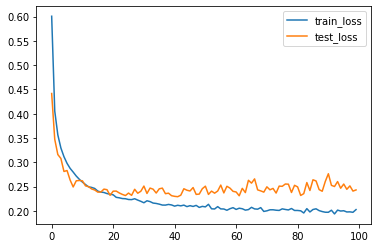

In [ ]:
plt.plot(r1.history["loss"] , label = "train_loss")
plt.plot(r1.history["val_loss"] , label = "test_loss")
plt.legend()

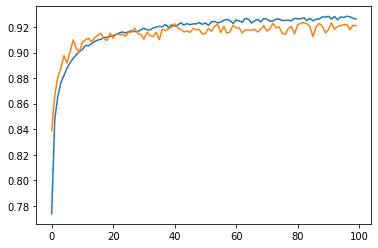

In [ ]:
plt.plot(r1.history["accuracy"])
plt.plot(r1.history["val_accuracy"])

In [ ]:
pred1 = np.argmax(model1.predict(xtest) , axis =1 )

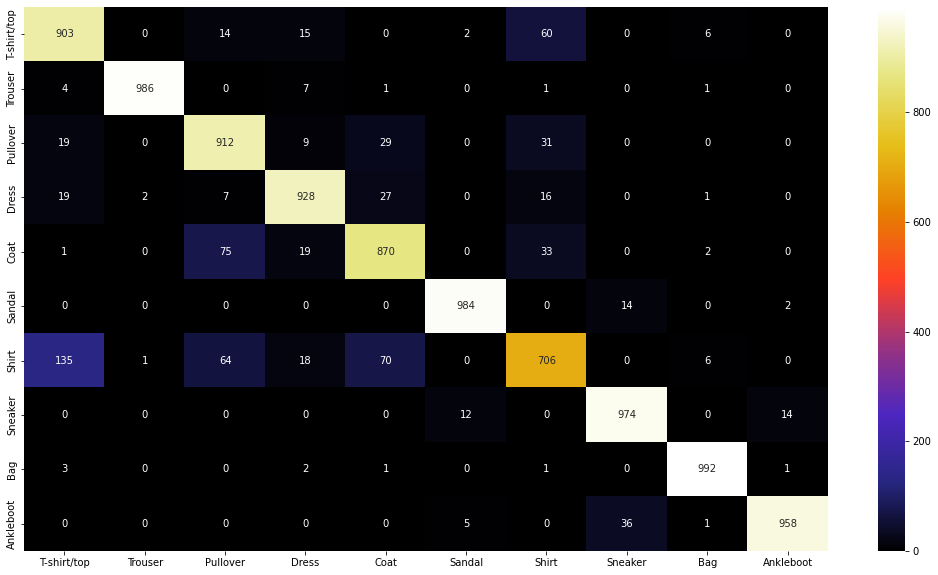

In [ ]:
plt.figure(figsize= (18 , 10))
heatmap = seaborn.heatmap(confusion_matrix(ytest , pred1) , annot = True , fmt = "d" , cmap= "CMRmap" , xticklabels= label  , yticklabels= label)
heatmap.set_yticklabels(label , verticalalignment = "center");

# Conclusion :


> ## Model before data augmentation and after almost produced same result
> ## From confusion matrix we can find that our model  has difficulty in finding difference between Shirts and T-Shirts



